In [26]:
import dataGrab
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [27]:
cc_x, cc_y = dataGrab.getcc()
fruit_x, fruit_y = dataGrab.getFruit()
drug_x, drug_y = dataGrab.getDrugs()

In [28]:
for i, j in [(cc_x, cc_y), (fruit_x, fruit_y), (drug_x, drug_y)]:
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(i, j)
    print(cross_val_score(sgd_clf, i, j, cv=3, scoring="accuracy"))

[0.23667062 0.23815166 0.21837037]
[0.87333333 0.89632107 0.85618729]
[0.92537313 0.92537313 0.89393939]


In [29]:
for i, j in [(cc_x, cc_y), (fruit_x, fruit_y), (drug_x, drug_y)]:
    km = KMeans(random_state=42, n_clusters=len(j.unique()), n_init=20)
    print(cross_val_score(km, i, j, cv=3, scoring="accuracy"))

[0.17861374 0.13122038 0.1602963 ]
[0. 0. 0.]
[0. 0. 0.]


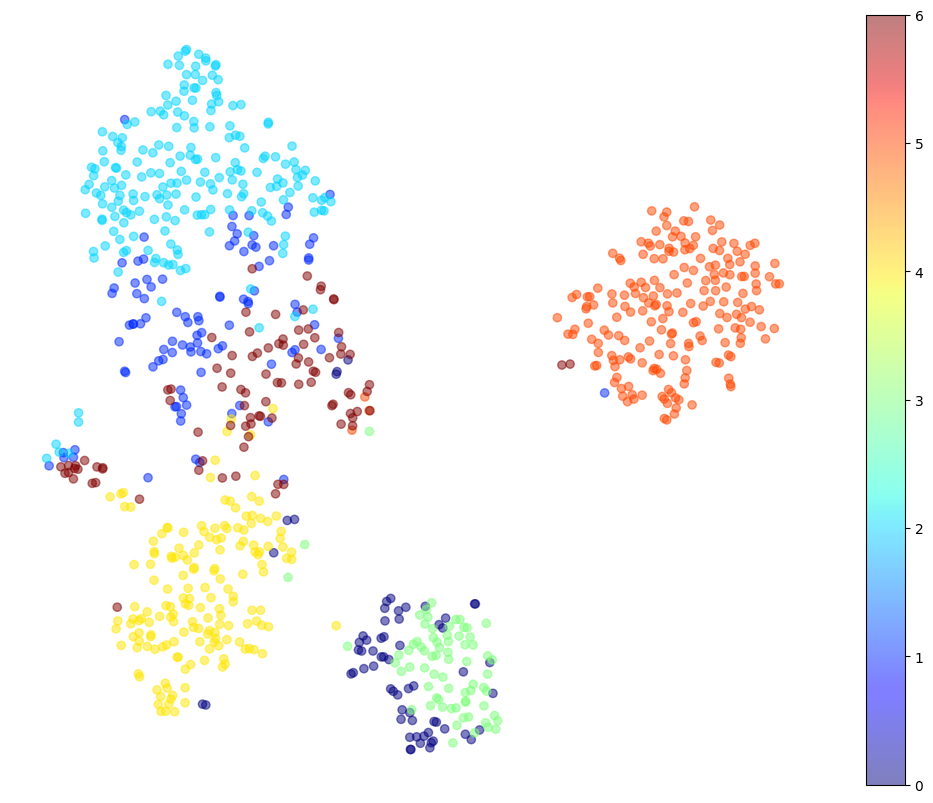

In [30]:
tsne = TSNE()
tsne.fit(fruit_x, fruit_y)

X_reduced = tsne.fit_transform(fruit_x)

w = pd.Series(fruit_y)
uList = list(fruit_y.unique())
for i in range(len(w)):
    w[i] = uList.index(fruit_y[i])

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=w.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

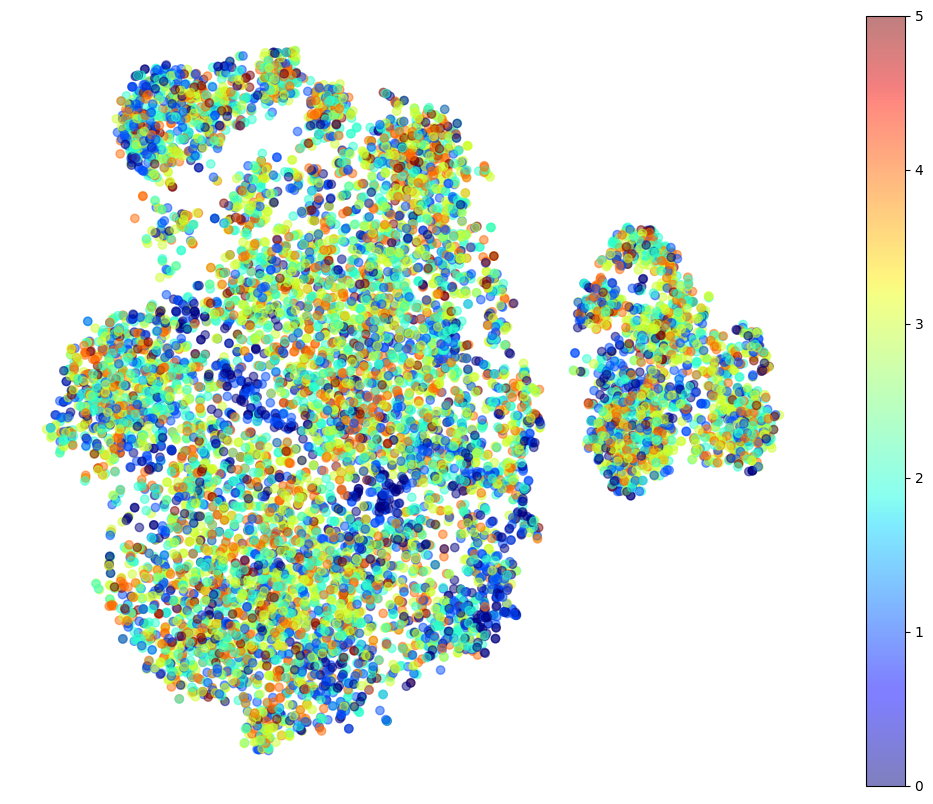

In [31]:
tsne = TSNE()
tsne.fit(cc_x, cc_y)

X_reduced = tsne.fit_transform(cc_x)

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=cc_y.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

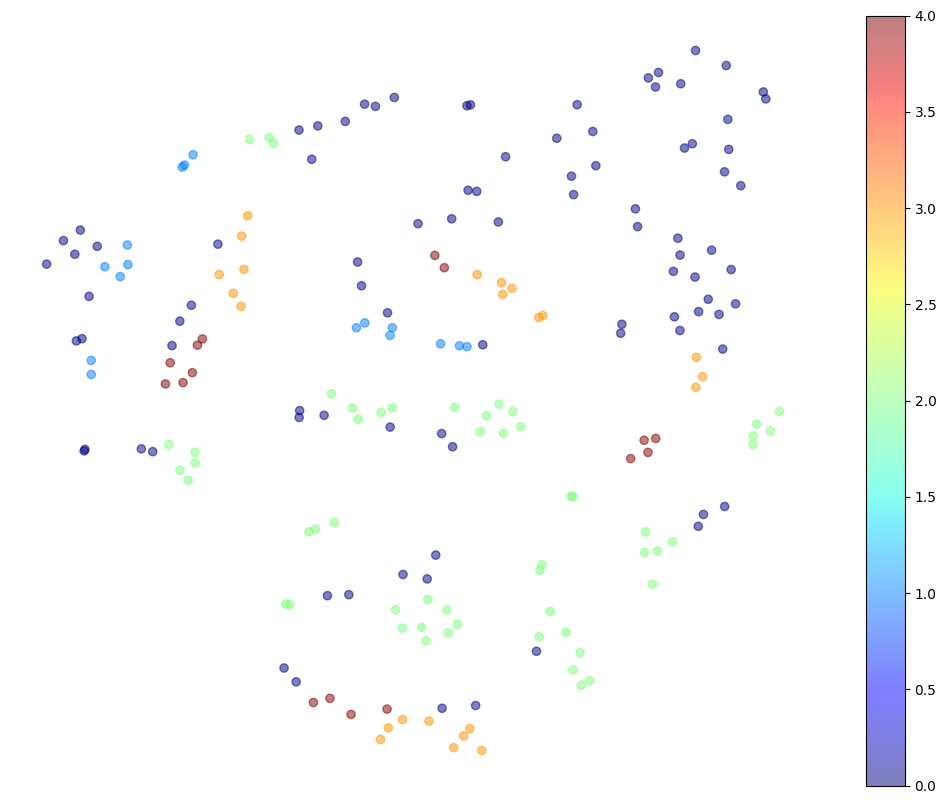

In [32]:
tsne = TSNE()
tsne.fit(drug_x, drug_y)

X_reduced = tsne.fit_transform(drug_x)

w = pd.Series(drug_y)
uList = list(drug_y.unique())
for i in range(len(w)):
    w[i] = uList.index(drug_y[i])

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=w.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

In [33]:
for i, j in [(cc_x, cc_y), (dataGrab.getFruit()), (dataGrab.getDrugs())]:
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(i, j)
    print(cross_val_score(rfc, i, j, cv=3, scoring="accuracy"))

[0.40077014 0.42950237 0.41333333]
[0.87       0.87959866 0.85953177]
[1.         1.         0.96969697]


In [34]:
for i, j in [(cc_x, cc_y), (dataGrab.getFruit()), (dataGrab.getDrugs())]:
    ada = AdaBoostClassifier(random_state=42)
    ada.fit(i, j)
    print(cross_val_score(ada, i, j, cv=3, scoring="accuracy"))

[0.35456161 0.37470379 0.32503704]
[0.3        0.65551839 0.63210702]
[0.85074627 0.82089552 0.83333333]
